In [6]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
!pip install scikit-learn==1.3.0

In [8]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# preprocessing dataset

In [13]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Data analysis

<Axes: >

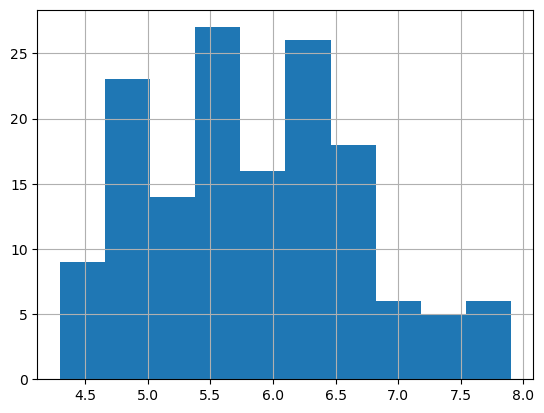

In [14]:
df['SepalLengthCm'].hist()

<Axes: >

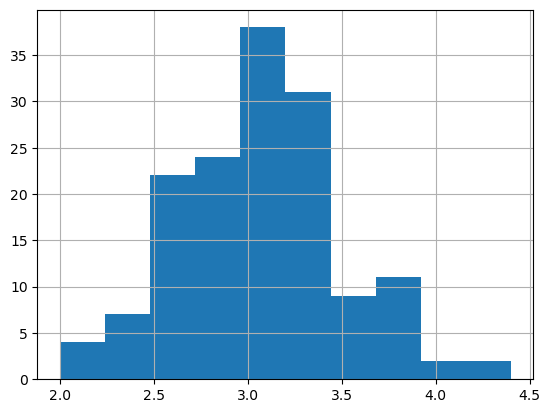

In [17]:
df['SepalWidthCm'].hist()

<Axes: >

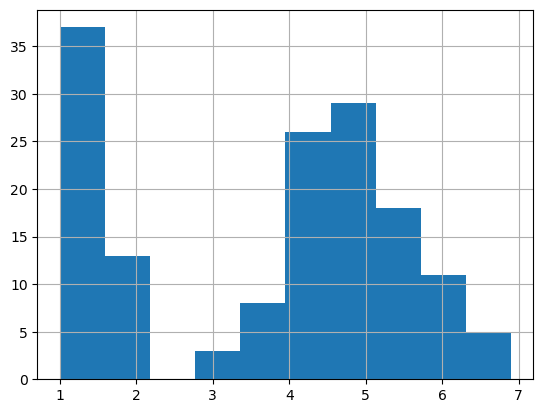

In [20]:
df['PetalLengthCm'].hist()

<Axes: >

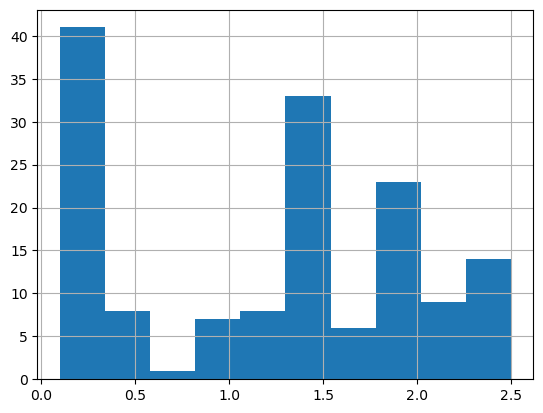

In [23]:
df['PetalWidthCm'].hist()

In [21]:
colors=['red','orange','blue']
species=['virginica','versicolor','setosa']

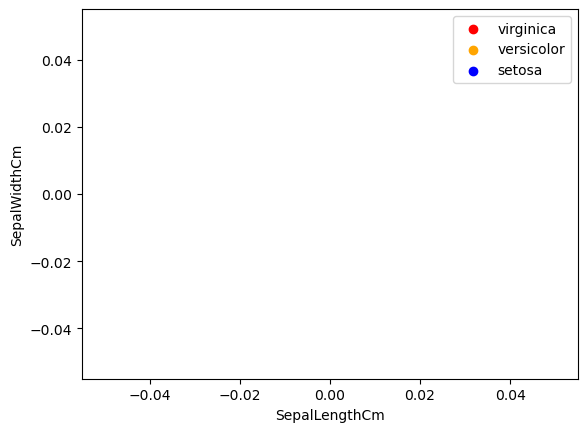

In [27]:
for i in range(3):
    x = df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.legend()

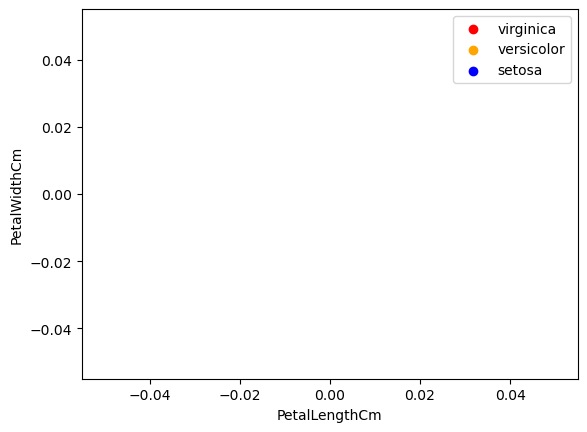

In [31]:
for i in range(3):
    x=df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c = colors[i],label=species[i])
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend()
    

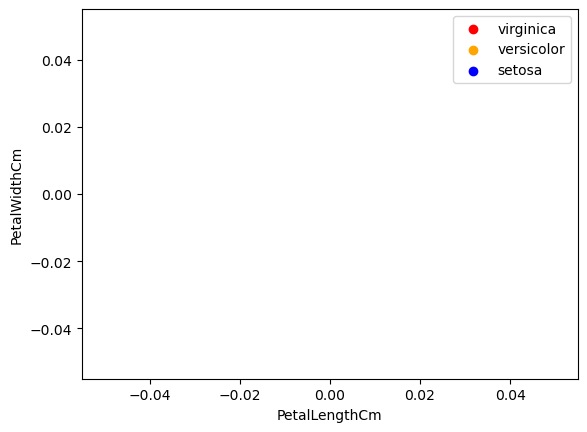

In [33]:
for i in range(3):
    x=df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c = colors[i],label=species[i])
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend()
    

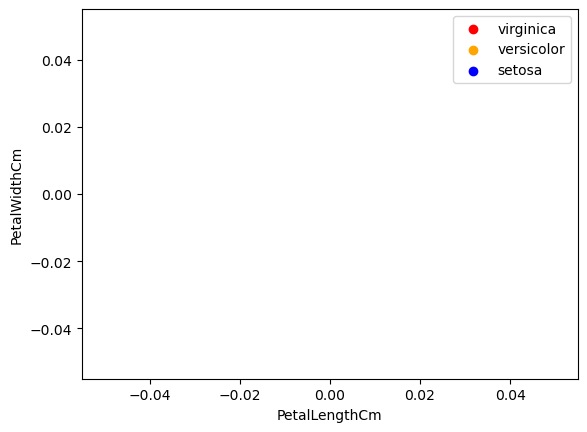

In [34]:
for i in range(3):
    x=df[df['Species'] == species[i]]
    plt.scatter(x['PetalWidthCm'],x['PetalWidthCm'],c = colors[i],label=species[i])
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend()
    

# label Encoder

In [45]:
 #from sklearn.preprocessing import LabelEncoder
#Le = LabelEncoder()
#transform the string labels to integer
#df['Species'] = Le.fit_transform(df['species'])
#df.head()

# Model Training and Testing

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

# input data
X = df.drop(columns=['Species'])
# output data
Y = df['Species']
# split the data for train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [52]:
model=LogisticRegression()
model.fit(x_train,y_train)
print("Logistic Regression Accuracy :", model.score(x_test,y_test)*100)

Logistic Regression Accuracy : 93.33333333333333


In [53]:
#model training
model.fit(x_train.values, y_train.values)

LogisticRegression()

In [54]:
#print metric to get perfromance
print("Accuracy: ",model.score(x_test, y_test) *100)

Accuracy:  93.33333333333333


In [55]:
# K-nearest neighbors
model = KNeighborsClassifier()
model.fit(x_train.values, y_train.values)
print(" K-nearest Neighbors Accuracy :", model.score(x_test,y_test)*100)

 K-nearest Neighbors Accuracy : 93.33333333333333


In [56]:
model.fit(x_train.values, y_train.values)

KNeighborsClassifier()

In [57]:
print("Accuracy: ",model.score(x_test, y_test) *100)

Accuracy:  93.33333333333333


In [59]:

#Decision Tree
model = DecisionTreeClassifier()
model.fit(x_train.values, y_train.values)
print(" Decision Tree Accuracy :", model.score(x_test,y_test)*100)

 Decision Tree Accuracy : 91.11111111111111


In [60]:
model.fit(x_train.values, y_train.values)

DecisionTreeClassifier()

In [61]:
print("Accuracy: ",model.score(x_test, y_test) *100)

Accuracy:  91.11111111111111


In [71]:
# save the model
import pickle
filename = 'saved_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [72]:
import pickle

In [73]:

# save the updated model
filename = 'saved_model.pkl'
try:
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print("model saved successfully.")
except Exception as e:
    print(f"Error saving the model: {e}")

model saved successfully.


In [74]:
load_model = pickle.load(open(filename, 'rb'))

In [75]:
load_model.predict([[6.0, 2.2, 4.0, 1.0]])

array(['Iris-versicolor'], dtype=object)

In [76]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
148,6.2,3.4,5.4,2.3
30,4.8,3.1,1.6,0.2
10,5.4,3.7,1.5,0.2
52,6.9,3.1,4.9,1.5
66,5.6,3.0,4.5,1.5


In [77]:
load_model.predict([[4,3,1,5]])

array(['Iris-setosa'], dtype=object)